## Simpler Returns - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:
MSFT = wb.DataReader('MSFT', data_source='yahoo', start='2000-1-1')
#PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
#MSFT = pd.read_csv('MSFT_2000_2017.csv', index_col = 'Date')
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,58.875000,58.125000,58.750000,58.375000,12517600.0,36.920826
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,36.861519
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.616329
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,35.991863
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,34.786217
...,...,...,...,...,...,...
2021-10-18,308.209991,302.690002,303.570007,307.290009,22729300.0,307.290009
2021-10-19,309.299988,307.220001,308.350006,308.230011,17682100.0,308.230011
2021-10-20,309.700012,306.109985,309.209991,307.410004,16537100.0,307.410004


Apply the .**head()** and **.tail()** methods to check if the data is ok. Always pay attention to the dates. Try to get an idea about how the stock price changed during the period.

In [12]:
MSFT.head(10)

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1999-12-31,58.87500,58.12500,58.75000,58.37500,12517600.0,36.920826,NaN
2000-01-03,59.31250,56.00000,58.68750,58.28125,53228400.0,36.861519,-0.001606
2000-01-04,58.56250,56.12500,56.78125,56.31250,54119000.0,35.616329,-0.033780
2000-01-05,58.18750,54.68750,55.56250,56.90625,64059600.0,35.991863,0.010544
2000-01-06,56.93750,54.18750,56.09375,55.00000,54976600.0,34.786217,-0.033498
2000-01-07,56.12500,53.65625,54.31250,55.71875,62013600.0,35.240807,0.013068
2000-01-10,56.84375,55.68750,56.71875,56.12500,44963600.0,35.497746,0.007291
2000-01-11,57.12500,54.34375,55.75000,54.68750,46743600.0,34.588581,-0.025612
2000-01-12,54.43750,52.21875,54.25000,52.90625,66532400.0,33.461971,-0.032572


In [4]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-18,308.209991,302.690002,303.570007,307.290009,22729300.0,307.290009
2021-10-19,309.299988,307.220001,308.350006,308.230011,17682100.0,308.230011
2021-10-20,309.700012,306.109985,309.209991,307.410004,16537100.0,307.410004
2021-10-21,311.019989,306.359985,307.170013,310.760010,16918100.0,310.760010
2021-10-22,311.089996,307.799988,310.399994,309.160004,17440800.0,309.160004


### Simple Rate of Return

Calculate the simple returns of ‘MSFT’ for the given timeframe.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:

MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1
print (MSFT['simple_return'])

Date
1999-12-31         NaN
2000-01-03   -0.001606
2000-01-04   -0.033780
2000-01-05    0.010544
2000-01-06   -0.033498
                ...   
2021-10-18    0.010125
2021-10-19    0.003059
2021-10-20   -0.002660
2021-10-21    0.010898
2021-10-22   -0.005149
Name: simple_return, Length: 5489, dtype: float64


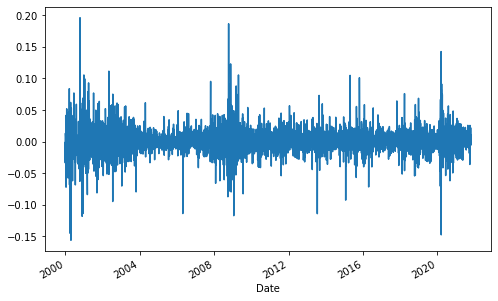

In [8]:
MSFT['simple_return'].plot(figsize=(8,5))
plt.show()

In [11]:
#avg day rate of return
avg_returns_d = MSFT['simple_return'].mean()
avg_returns_d

0.0005730421011321545

In [13]:
#avg annual rate of return
#not composed of 365 days
#saturday sunday and public holidays are excluded so we can use some number say 250 for trading days
avg_returns_a = MSFT['simple_return'].mean()*250
avg_returns_a

0.14326052528303862

In [17]:
print(str(round(avg_returns_a,5)*100) + ' %')

14.326 %


In [ ]:
#Log returns are preferable when you make calculations about a single asset over time

#when considering multiple securities in a same period -> simple rate of return


### Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

Calculate the Log returns for Microsoft.

In [18]:
MSFT['log_return'] = np.log(MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print (MSFT['log_return'])

Date
1999-12-31         NaN
2000-01-03   -0.001608
2000-01-04   -0.034364
2000-01-05    0.010489
2000-01-06   -0.034072
                ...   
2021-10-18    0.010074
2021-10-19    0.003054
2021-10-20   -0.002664
2021-10-21    0.010839
2021-10-22   -0.005162
Name: log_return, Length: 5489, dtype: float64


Plot the results on a graph.

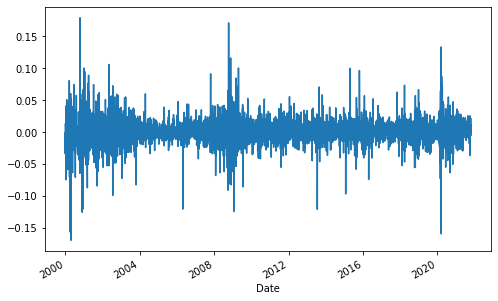

In [19]:
MSFT['log_return'].plot(figsize=(8, 5))
plt.show()

Estimate the daily and the annual mean of the obtained log returns.

In [20]:
log_return_d = MSFT['log_return'].mean()
log_return_d

0.0003872236102646974

In [21]:
log_return_a = MSFT['log_return'].mean() * 250
log_return_a

0.09680590256617436

Print the result in a presentable form.

In [22]:
print (str(round(log_return_a, 5) * 100) + ' %')

9.681 %
